<a href="https://colab.research.google.com/github/JatinSharma222/AI-experiments-Univaersity/blob/main/Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 6
Performing binary classification using logistic regression


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   class              150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


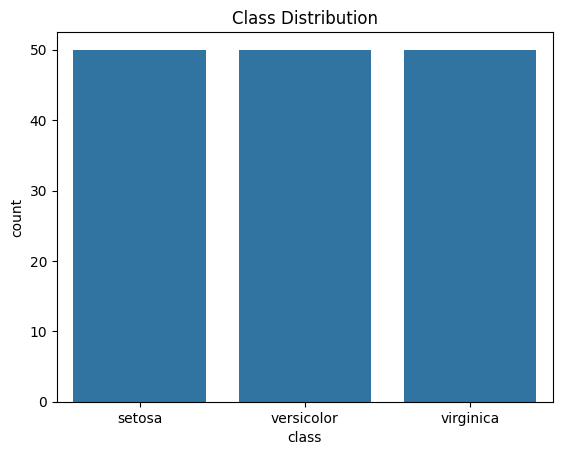

<ipython-input-2-36ba9798362d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['class'] = df_binary['class'].map({'setosa': 0, 'versicolor': 1})


Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



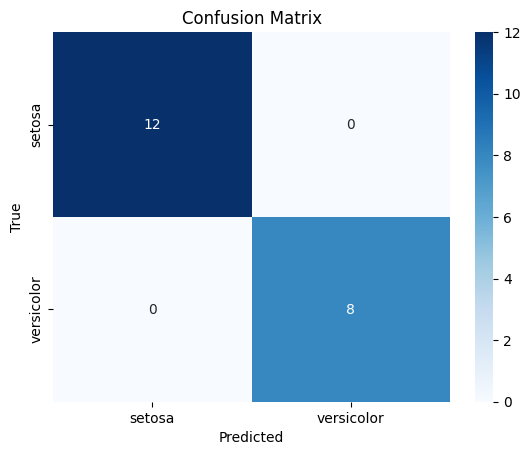

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the dataset
df = pd.read_csv('/content/csv_data_iris.csv')

# Display the first few rows of the dataset
df.head()

# Checking for missing values
df.isnull().sum()

# Display basic information about the dataset
df.info()

# Visualizing the class distribution in the target column
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

# For binary classification, we will filter the dataset to include two classes.
# Let's classify 'setosa' (0) vs 'versicolor' (1) as an example:
# We'll assume that 'versicolor' and other classes are the focus of the binary classification task.
df_binary = df[df['class'].isin(['setosa', 'versicolor'])]

# Encoding the target variable 'class' to numeric values
df_binary['class'] = df_binary['class'].map({'setosa': 0, 'versicolor': 1})

# Splitting the dataset into features (X) and target (y)
X = df_binary[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_binary['class']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor'], yticklabels=['setosa', 'versicolor'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

